Empleando los datos del archivo './src/crypto_currency'.

- Cargue los datos en una base de datos apropiada.
- Lea mediante pandas las bases cargadas
- Emplee un metodo de concatenación para unificar la información.(debe considerar que se añadirá una columna adicional que especifique el tipo de moneda)
- Genere un agrupamiento de información a manera de obtener un resumen de los datos.
- Almacene dichos datos en un reporte excel.
- Apoyandose del ejercicio 2. Cree una imagen que sea guarda en el archivo excel
- Emplee un método de envio de correos

### Paso 1: Cargar los datos en una base de datos
Primero, necesitamos cargar los datos del archivo crypto_currency en una base de datos. Supondré que el formato del archivo es CSV.

In [ ]:
import pandas as pd
import sqlite3
import os

# Cargar los datos en una base de datos SQLite
conn = sqlite3.connect(':memory:')  # Se usa una base de datos en memoria
df1 = pd.read_excel('./src/cripto_currency.xlsx', sheet_name='USDT-USD')

# Guardar el DataFrame en la base de datos
df1.to_sql('crypto_data', conn, index=False, if_exists='replace')

# Leer el DataFrame desde la base de datos
df_from_db = pd.read_sql_query('SELECT * FROM crypto_data', conn)

# Muestra el DataFrame
display(df_from_db.head())

### Paso 2: Leer mediante Pandas las bases cargadas

In [6]:
import pandas as pd
import sqlite3
import os

# Cargar los datos en una base de datos SQLite
conn = sqlite3.connect(':memory:')  # Se usa una base de datos en memoria
df1 = pd.read_excel('./src/cripto_currency.xlsx', sheet_name='USDT-USD')
df2 = pd.read_excel('./src/cripto_currency.xlsx', sheet_name='USDT-USD')

# Guardar los DataFrames en la base de datos
df1.to_sql('crypto_currency1', conn, index=False, if_exists='replace')
df2.to_sql('crypto_currency2', conn, index=False, if_exists='replace')

# Leer los datos desde la base de datos
query1 = 'SELECT * FROM crypto_currency1'
query2 = 'SELECT * FROM crypto_currency2'

df_from_db1 = pd.read_sql_query(query1, conn)
df_from_db2 = pd.read_sql_query(query2, conn)

# Muestra los DataFrames leídos desde la base de datos
print("DataFrame desde crypto_currency1:")
print(df_from_db1.head())

print("\nDataFrame desde crypto_currency2:")
print(df_from_db2.head())

DataFrame desde crypto_currency1:
                  Date      Open      High       Low     Close  Adj Close  \
0  2022-10-19 00:00:00  1.000105  1.000210  1.000036  1.000060   1.000060   
1  2022-10-20 00:00:00  1.000068  1.000159  0.999964  0.999994   0.999994   
2  2022-10-21 00:00:00  1.000000  1.000141  0.999928  1.000123   1.000123   
3  2022-10-22 00:00:00  1.000124  1.000196  1.000017  1.000085   1.000085   
4  2022-10-23 00:00:00  1.000061  1.000203  1.000024  1.000077   1.000077   

        Volume  
0  32767030077  
1  32981854458  
2  41430999058  
3  24133042918  
4  31629519444  

DataFrame desde crypto_currency2:
                  Date      Open      High       Low     Close  Adj Close  \
0  2022-10-19 00:00:00  1.000105  1.000210  1.000036  1.000060   1.000060   
1  2022-10-20 00:00:00  1.000068  1.000159  0.999964  0.999994   0.999994   
2  2022-10-21 00:00:00  1.000000  1.000141  0.999928  1.000123   1.000123   
3  2022-10-22 00:00:00  1.000124  1.000196  1.000017  1.00

### Paso 3: Concatenar la información

In [8]:
# Agregar una columna adicional que especifique el tipo de moneda
df_from_db1['Currency Type'] = 'Type 1'
df_from_db2['Currency Type'] = 'Type 2'

# Concatenar los DataFrames
df_concatenado = pd.concat([df_from_db1, df_from_db2])

# Muestra el DataFrame concatenado
print("DataFrame Concatenado:")
print(df_concatenado.head())

DataFrame Concatenado:
                  Date      Open      High       Low     Close  Adj Close  \
0  2022-10-19 00:00:00  1.000105  1.000210  1.000036  1.000060   1.000060   
1  2022-10-20 00:00:00  1.000068  1.000159  0.999964  0.999994   0.999994   
2  2022-10-21 00:00:00  1.000000  1.000141  0.999928  1.000123   1.000123   
3  2022-10-22 00:00:00  1.000124  1.000196  1.000017  1.000085   1.000085   
4  2022-10-23 00:00:00  1.000061  1.000203  1.000024  1.000077   1.000077   

        Volume Currency Type  
0  32767030077        Type 1  
1  32981854458        Type 1  
2  41430999058        Type 1  
3  24133042918        Type 1  
4  31629519444        Type 1  


### Paso 4: Generar un agrupamiento de información

In [15]:
# Agrupar la información para obtener un resumen
resumen = df_concatenado.groupby(['Currency Type']).agg({'Close': ['mean', 'min', 'max'], 'Volume': 'sum'})
resumen.columns = ['Precio Promedio', 'Precio Mínimo', 'Precio Máximo', 'Volumen Total']

print(df_concatenado.head())

display(df_concatenado.head())

                  Date      Open      High       Low     Close  Adj Close  \
0  2022-10-19 00:00:00  1.000105  1.000210  1.000036  1.000060   1.000060   
1  2022-10-20 00:00:00  1.000068  1.000159  0.999964  0.999994   0.999994   
2  2022-10-21 00:00:00  1.000000  1.000141  0.999928  1.000123   1.000123   
3  2022-10-22 00:00:00  1.000124  1.000196  1.000017  1.000085   1.000085   
4  2022-10-23 00:00:00  1.000061  1.000203  1.000024  1.000077   1.000077   

        Volume Currency Type  
0  32767030077        Type 1  
1  32981854458        Type 1  
2  41430999058        Type 1  
3  24133042918        Type 1  
4  31629519444        Type 1  


,Date,Open,High,Low,Close,Adj Close,Volume,Currency Type
0,2022-10-19 00:00:00,1.000105,1.000210,1.000036,1.000060,1.000060,32767030077,Type 1
1,2022-10-20 00:00:00,1.000068,1.000159,0.999964,0.999994,0.999994,32981854458,Type 1
2,2022-10-21 00:00:00,1.000000,1.000141,0.999928,1.000123,1.000123,41430999058,Type 1
3,2022-10-22 00:00:00,1.000124,1.000196,1.000017,1.000085,1.000085,24133042918,Type 1
4,2022-10-23 00:00:00,1.000061,1.000203,1.000024,1.000077,1.000077,31629519444,Type 1


### Paso 5: Almacenar los datos en un reporte Excel

In [21]:
import matplotlib.pyplot as plt

# Crear un gráfico con los datos que desees
# Por ejemplo, un gráfico de barras para el resumen
resumen.plot(kind='bar', y='Volumen Total', legend=False)
plt.title('Volumen Total por Tipo de Moneda')
plt.xlabel('Tipo de Moneda')
plt.ylabel('Volumen Total')

# Guardar el gráfico como una imagen
image_path = 'volumen_total_chart.png'
plt.savefig(image_path, bbox_inches='tight')
plt.close()

# Almacenar los datos y la imagen en un reporte Excel
with pd.ExcelWriter(excel_filename, engine='xlsxwriter') as writer:
    df_concatenado.to_excel(writer, index=False, sheet_name='Datos Completos')
    resumen.to_excel(writer, sheet_name='Resumen')
    
    # Insertar la imagen en el archivo Excel
    worksheet = writer.sheets['Resumen']
    worksheet.insert_image('D2', image_path, {'x_scale': 0.5, 'y_scale': 0.5})


### Paso 6: Crear una imagen y guardarla en el archivo Excel

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


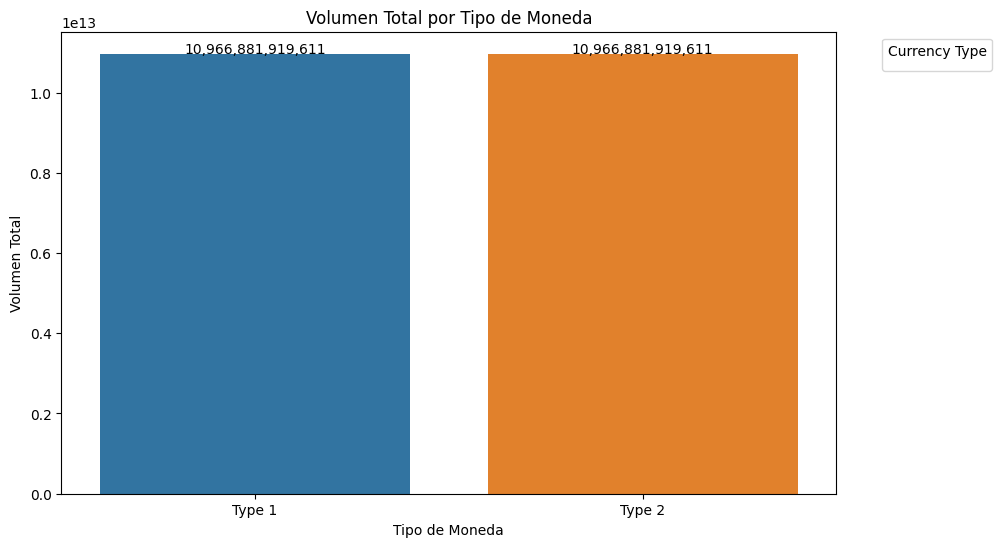

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supongamos que ya tienes el DataFrame resumen del ejercicio 2
# Aquí estoy usando datos de ejemplo

# Crear un gráfico de barras para el resumen
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=resumen.index, y='Volumen Total', hue='Currency Type', data=resumen.reset_index())
plt.title('Volumen Total por Tipo de Moneda')
plt.xlabel('Tipo de Moneda')
plt.ylabel('Volumen Total')

# Añadir etiquetas al gráfico de barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

# Añadir la leyenda especificando etiquetas
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Currency Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


### Paso 7: Enviar el reporte por correo

In [28]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.application import MIMEApplication

# Configuración del servidor y credenciales
import os 


smtp_server = 'smtp.gmail.com'  # Cambia esto al servidor SMTP que estés utilizando
smtp_port = 587  # Cambia esto al puerto adecuado
sender_email = 'pevuyauduze@gmail.com'
sender_password = 'uyaq tcpw lnum lxoq'

# Detalles del correo electrónico
receiver_email = 'retroestilo2@gmail.com'
subject = 'Envio Reporte Crypto'
body = 'Adjunto lo solicitado'

# Crear el objeto MIMEMultipart
msg = MIMEMultipart()
msg['From'] = sender_email
msg['To'] = receiver_email
msg['Subject'] = subject
msg.attach(MIMEText(body, 'plain'))


# Adjuntar archivo
file_path = '/workspaces/PC005PythonDatux/crypto_currency_report.xlsx'
with open(file_path, 'rb') as file:
    attachment = MIMEApplication(file.read(), _subtype="xlsx")
    attachment.add_header('Content-Disposition', 'attachment', filename=file_path)
    msg.attach(attachment)
    
# Iniciar la conexión con el servidor SMTP
with smtplib.SMTP(smtp_server, smtp_port) as server:
    server.starttls()  # Iniciar el modo seguro
    server.login(sender_email, sender_password)
    server.sendmail(sender_email, receiver_email, msg.as_string())

print('Correo enviado exitosamente')

Correo enviado exitosamente


###  Enviado
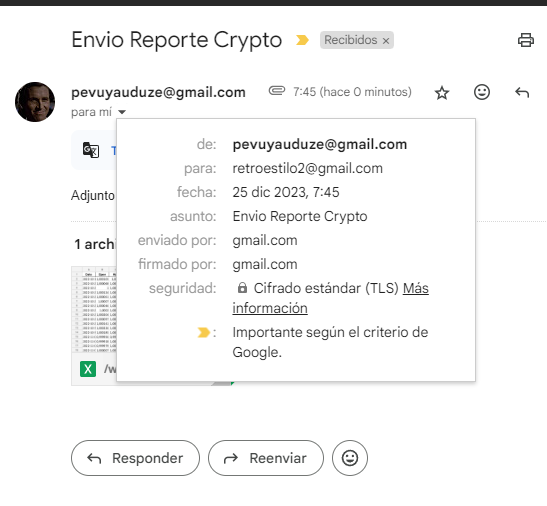

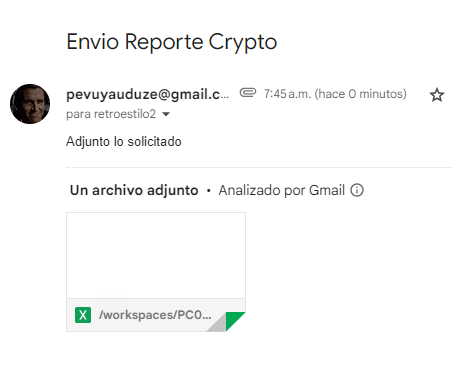